In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.fftpack import fftn, ifftn, fftshift

### Note: code also uploaded to github. https://github.com/Haiyun314/Image_processing/tree/main
Python3 --version = 3.10.8

numpy.__version__ = '1.23.2' 

matplotlib.__version__ = '3.6.3'


In [2]:
def create_gaussian_blurring_operator(size_I, hsize, sigma):
    """
    Creates an operator for blurring with a Gaussian kernel of size 'hsize' and standard deviation 'sigma'
    """
    kernel = np.outer(gaussian_filter(np.zeros((hsize,)), sigma), gaussian_filter(np.zeros((hsize,)), sigma))
    kernel[int((hsize-1)/2), int((hsize-1)/2)] = 1
    kernel = gaussian_filter(kernel, sigma)

    fft_filter = np.zeros(size_I)
    fft_filter[:kernel.shape[0], :kernel.shape[1]] = kernel

    # Center the kernel
    fft_filter = np.roll(fft_filter, -int((kernel.shape[0]-1)/2), axis=0)
    fft_filter = np.roll(fft_filter, -int((kernel.shape[1]-1)/2), axis=1)

    # Precalculate FFT
    fft_filter = fftn(fft_filter)
    fft_filterC = np.conj(fft_filter)

    # Setup the operators
    Op = lambda x: np.real(ifftn(fftn(x) * fft_filter))
    Op_adj = lambda y: np.real(ifftn(fftn(y) * fft_filterC))

    return Op, Op_adj, fft_filter

In [3]:
def deconv_van_cittert(I_nse, kA, iterations):
    """
    Deconvolution using Van-Cittert iterations
    """
    u = np.copy(I_nse)
    for _ in range(iterations):
        u = u + kA(I_nse - kA(u))
    return u


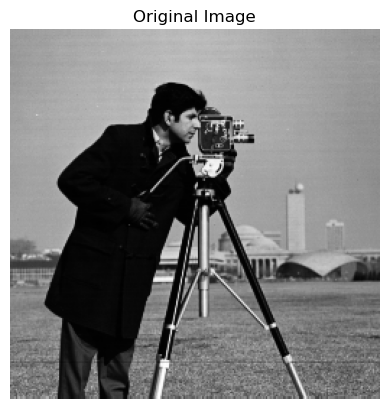

In [4]:

I = plt.imread('images/cameraman.png')
I = I*255
plt.figure()
plt.imshow(I, cmap='gray')
plt.axis('off')
plt.title('Original Image')

# Adding noise for denoising purposes
k = 5
gamma = 2 * k + 1  # size of kernel
sigma = 2  # sqrt variance of kernel
conv_op, conv_adj_op, kA = create_gaussian_blurring_operator(I.shape, gamma, sigma)

var = 5  # noise variance
I_nse = conv_op(I) + var * np.random.randn(*I.shape)


Text(0.5, 1.0, 'Blurred and Noisy Image')

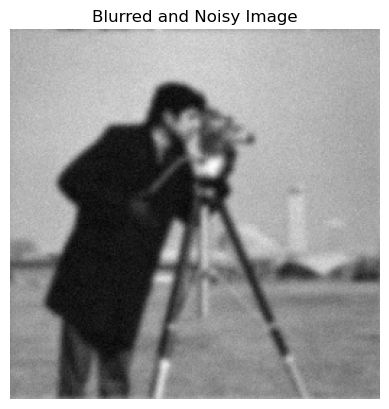

In [5]:
# Visualize blurred and noisy image
plt.figure()
plt.imshow(I_nse, cmap='gray')
plt.axis('off')
plt.title('Blurred and Noisy Image')


Text(0.5, 1.0, 'Van-Cittert Deconvolution')

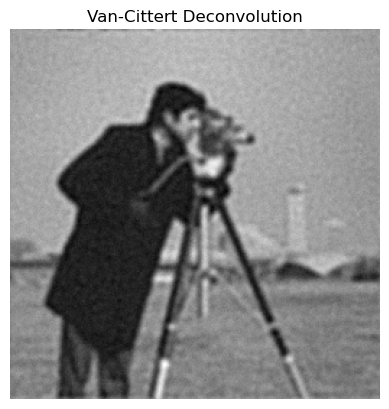

In [7]:
# Deconvolution using Van-Cittert iterations
iterations = 15
uv = deconv_van_cittert(I_nse, conv_op, iterations)

# Visualize deconvolution results
plt.figure()
plt.imshow(uv, cmap='gray')
plt.axis('off')
plt.title('Van-Cittert Deconvolution')
